In [5]:
#Let's first import the necessary packages

#For our data analysis and wrangling
import pandas as pd
import numpy as np

#For our data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#lastly, for our machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import svm # for Support Vector Machine
from sklearn import metrics

In [6]:
#Let us now import our data and take a look
data = pd.read_csv(r"C:\Users\Zayn Justin\Desktop\Intro to Software Engineering Final Project - Group 8\f747c609686affa4f73f44e11c1c9c84-f83d947ce945a96d8abffa02c8d09f4fa3d76215\data.csv")
print(data.head())
print(data.tail())
#We then also check for null values.
data.isnull().sum()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.drop("Unnamed: 32",axis=1,inplace=True)

In [8]:
#We look at the available features in our dataset
print(data.columns.values)

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


In [9]:
#Let's take a look at the data types available
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
#What is the distribution of numerical feature values across the samples?
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
#What is the distribution of categorical features?
data.describe(include=['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


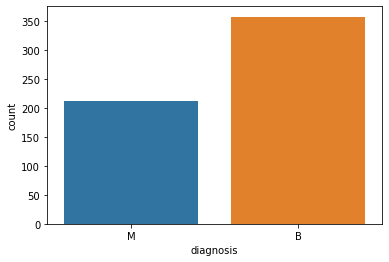

In [12]:
#Let us analyze more the data, by doing visualization
s = sns.countplot(data['diagnosis'], label = "Count")

In [13]:
#Now, we find the correlation between the features, by plotting 
#them in a correlation graph 
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])
print(features_mean)
print(features_se)
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


(10.0, 0)

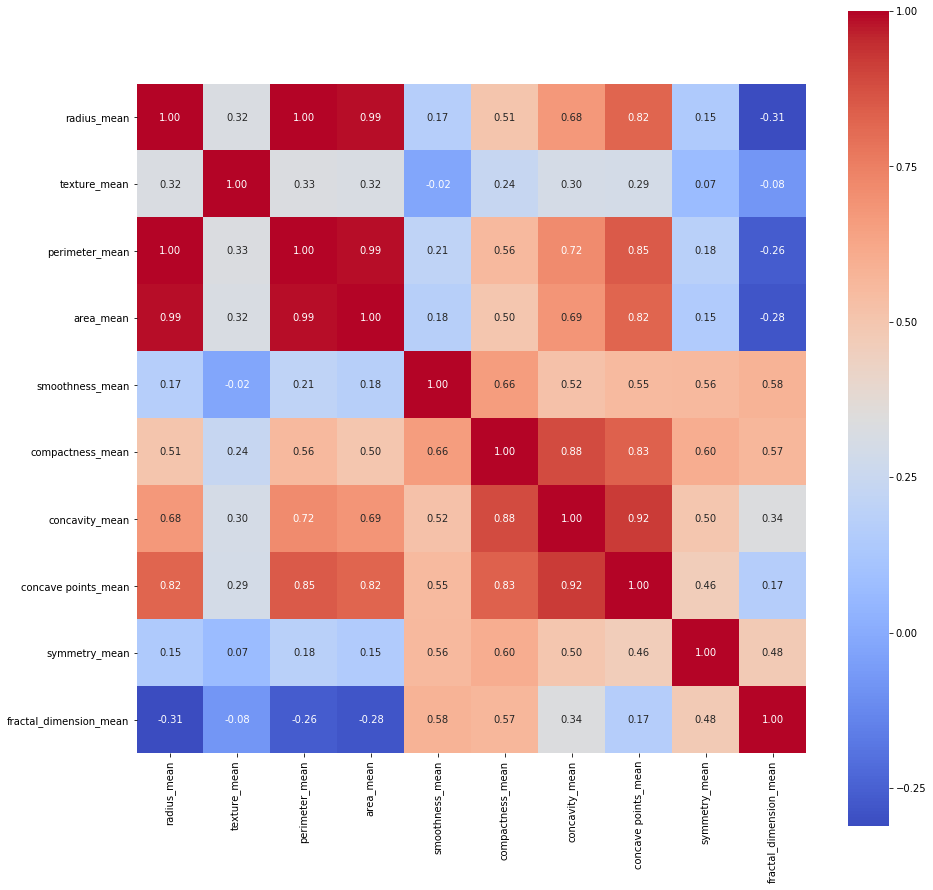

In [14]:
corr = data[features_mean].corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')
ax.get_ylim()
ax.set_ylim(10.0, 0)

(10.0, 0)

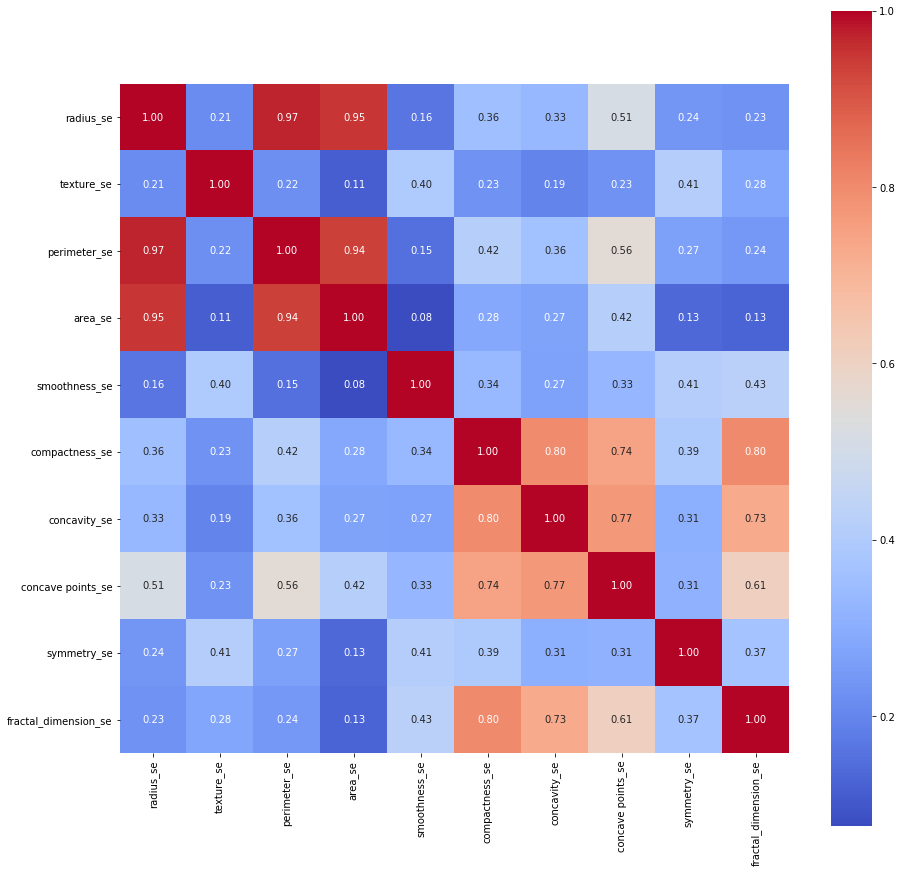

In [15]:
corr = data[features_se].corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10},
           xticklabels= features_se, yticklabels= features_se,
           cmap= 'coolwarm')
ax.get_ylim()
ax.set_ylim(10.0, 0)

(10.0, 0)

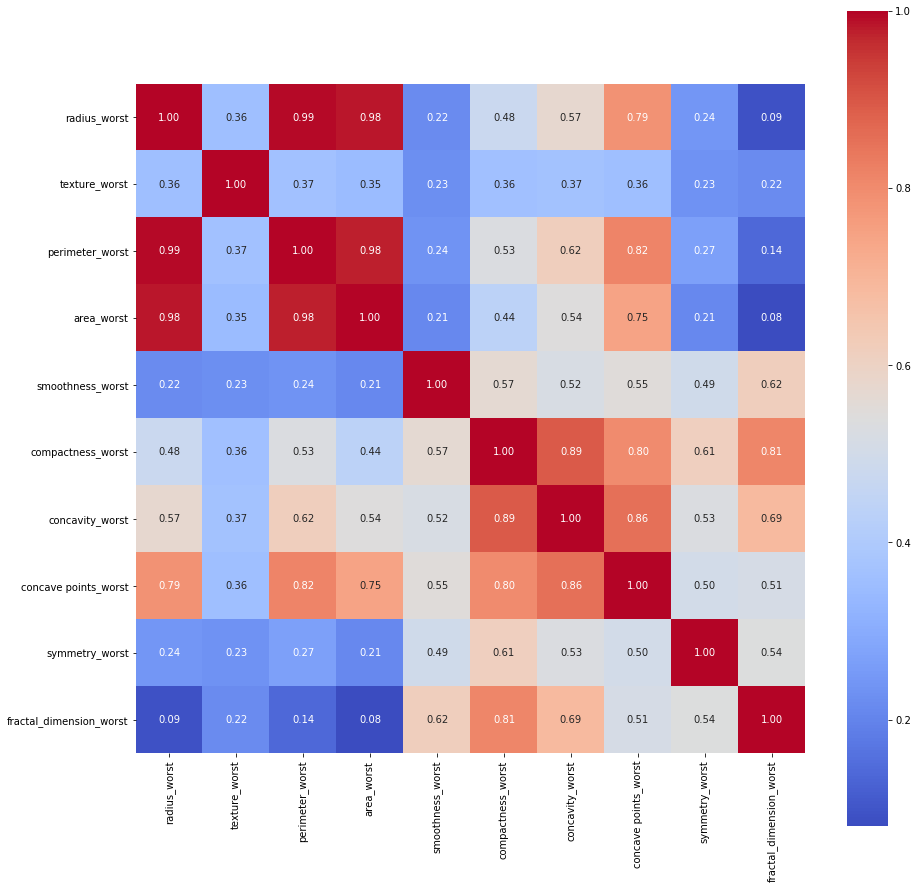

In [16]:
corr = data[features_worst].corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10},
           xticklabels= features_worst, yticklabels= features_worst,
           cmap= 'coolwarm')
ax.get_ylim()
ax.set_ylim(10.0, 0)

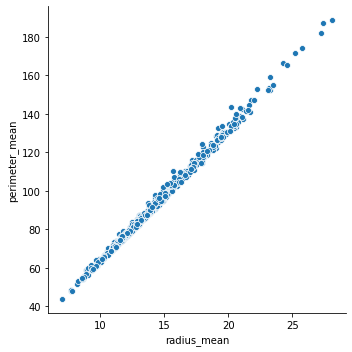

In [17]:
sns.relplot(x = 'radius_mean' , y = 'perimeter_mean' , data=data)

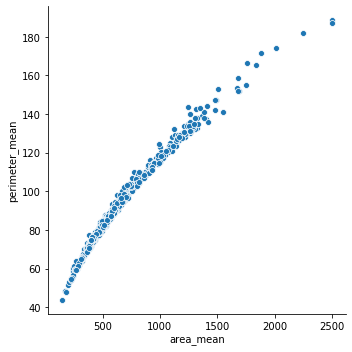

In [18]:
sns.relplot(x = 'area_mean' , y = 'perimeter_mean' , data=data)

In [19]:
#Now let's drop the columns that have correlation and high correlation. 
drplist1 = ['id','diagnosis','perimeter_mean','radius_mean','compactness_mean','concave points_mean',
            'radius_se','perimeter_se','radius_worst','perimeter_worst',
            'compactness_worst','concave points_worst','compactness_se',
            'concave points_se','texture_worst','area_worst']
x1 = data.drop(drplist1,axis = 1 )
x1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


(10.0, 0)

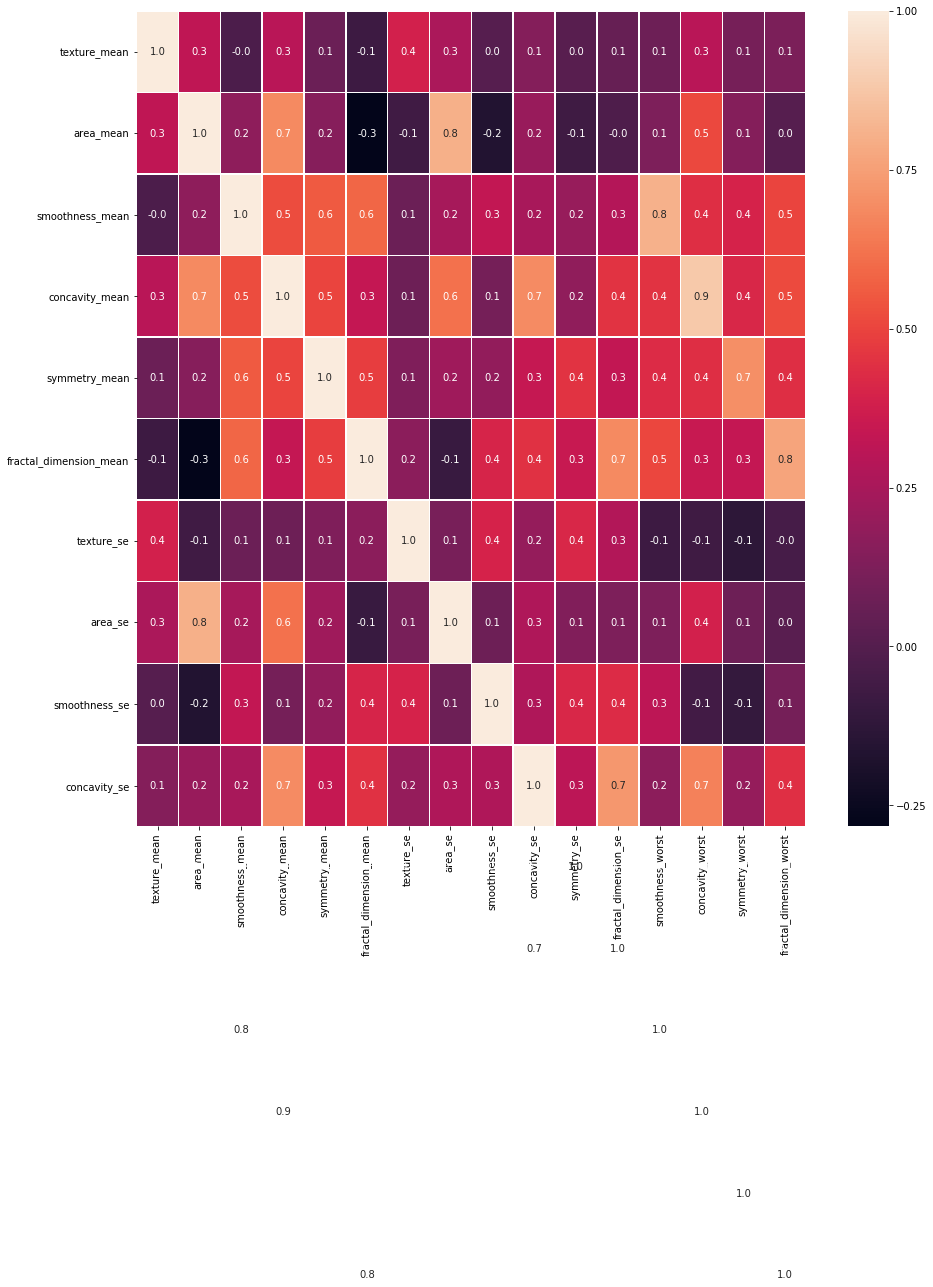

In [20]:
#Let's do feature extraction using correlation and Random Forest Classification
f, ax = plt.subplots(figsize=(15, 15))
v = sns.heatmap(x1.corr(), annot = True, linewidths = .5, fmt = '.1f', ax=ax)
v.get_ylim()
v.set_ylim(10.0, 0)

Accuracy is:  0.9532163742690059


c:\users\zayn justin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(2.0, 0)

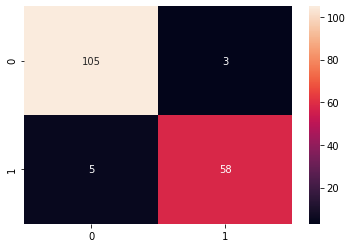

In [21]:
y = data.diagnosis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
rfne = RandomForestClassifier(random_state=43)      
rfne = rfne.fit(x_train,y_train)

ac = accuracy_score(y_test,rfne.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,rfne.predict(x_test))
hm = sns.heatmap(cm,annot=True,fmt="d")
hm.get_ylim()
hm.set_ylim(2.0, 0)

In [22]:
pred_var = ['radius_mean' , 'perimeter_mean' , 'area_mean' , 'radius_se' , 'perimeter_se'
           , 'radius_worst' , 'perimeter_worst' , 'area_worst']
#We will use these variables for our prediction

In [23]:
#then now, we split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [24]:
train_X = train[pred_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[pred_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [25]:
rfcmodel=RandomForestClassifier(n_estimators=100)# let's try it with a simple random forest model

In [26]:
rfcmodel.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
prediction=rfcmodel.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs
ty = [[17.99 , 122.8, 1001, 1.095, 8.589, 25.38, 184.6, 2019]]
yow=rfcmodel.predict(ty)
print(yow)

['M']


In [28]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9707602339181286